In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
import tensorflow as tf
import random
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
_URL = "https://firebasestorage.googleapis.com/v0/b/ds620-group-project.appspot.com/o/good_bad_weather_filter.zip?alt=media&token=2acd663c-1085-4c8b-8d3d-2438890d7aba"
path_to_zip = tf.keras.utils.get_file('good_bad_weather_file.zip', origin=_URL, extract=True)
PATH = os.path.join(os.path.dirname(path_to_zip), 'good_bad_weather_filter')

dir = os.path.join(PATH)
dir


27108778/27108778 [==============================] - 1s 0us/step


'/root/.keras/datasets/good_bad_weather_filter'

In [ ]:
categories = ['good', 'bad']
data = []

for category in categories:
  path = os.path.join(dir, category)
  label = categories.index(category)

  for img in os.listdir(path):
    imgpath = os.path.join(path, img)
    weather_img = cv2.imread(imgpath, 1)
    try:
      weather_img = cv2.resize(weather_img,(50,50))
      image = np.array(weather_img).flatten()
      data.append([image, label])
    except Exception as e:
      pass

print(data)

[[array([ 99, 245, 197, ...,  30, 115,  52], dtype=uint8), 0], [array([247, 217, 216, ..., 163, 132, 131], dtype=uint8), 0], [array([172, 118,  23, ..., 255, 253, 249], dtype=uint8), 0], [array([134, 166, 142, ...,  43,  91,  63], dtype=uint8), 0], [array([ 78, 182, 107, ...,  71, 161,  85], dtype=uint8), 0], [array([124,  98,  52, ...,  56, 127,  68], dtype=uint8), 0], [array([118, 119, 123, ..., 157, 154, 149], dtype=uint8), 0], [array([137, 146, 143, ..., 109, 175, 224], dtype=uint8), 0], [array([15, 15,  9, ..., 27, 28, 24], dtype=uint8), 0], [array([20, 45, 68, ..., 98, 98, 99], dtype=uint8), 0], [array([70, 50, 39, ...,  4, 98, 87], dtype=uint8), 0], [array([159, 155, 147, ...,  85, 127, 110], dtype=uint8), 0], [array([ 71, 138,  93, ...,  35,  98,  57], dtype=uint8), 0], [array([211, 179, 130, ...,  45,  73,  53], dtype=uint8), 0], [array([73, 84, 52, ..., 53, 79, 42], dtype=uint8), 0], [array([127, 121, 122, ...,  67, 126,  91], dtype=uint8), 0], [array([  0,   0,   0, ...,  27

In [ ]:
random.shuffle(data)
features = []
labels = []

for feature, label in data:
  features.append(feature)
  labels.append(label)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.3)

model = SVC(C=1, kernel='poly', gamma='auto')
model.fit(x_train, y_train)

SVC(C=1, gamma='auto', kernel='poly')

<BarContainer object of 2 artists>

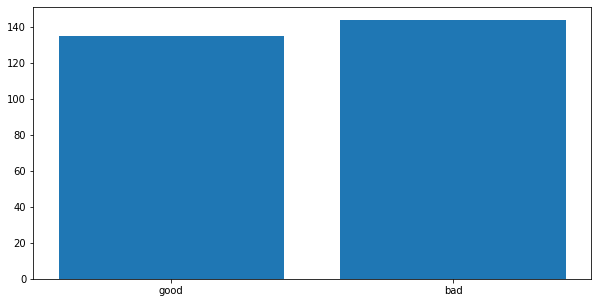

In [ ]:
from collections import Counter
import seaborn as sns

import matplotlib.pyplot as plt
c = Counter(y_train)
x =c.get(1),c.get(0)
fig = plt.figure(figsize = (10,5))
y=categories
plt.bar( y,x )

# Training Data 

<BarContainer object of 2 artists>

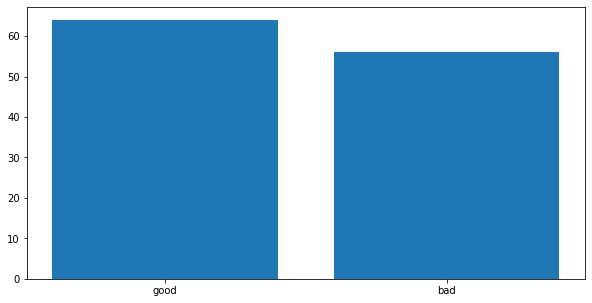

In [ ]:
import matplotlib.pyplot as plt
c = Counter(y_test)
x =c.get(1),c.get(0)
fig = plt.figure(figsize = (10,5))
y=categories
plt.bar( y,x )
#Test Data 

Accuracy 75.0%
Prediction with SVM is bad weather


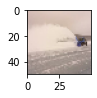

Prediction with SVM is good weather


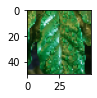

Prediction with SVM is bad weather


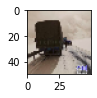

Prediction with SVM is bad weather


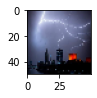

Prediction with SVM is bad weather


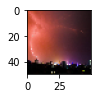

Prediction with SVM is good weather


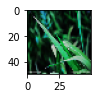

Prediction with SVM is bad weather


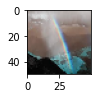

Prediction with SVM is bad weather


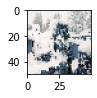

Prediction with SVM is good weather


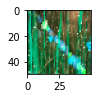

In [ ]:
# Prediction

y_predict = model.predict(x_test)

accuracy = accuracy_score(y_test, y_predict) * 100

print("Accuracy {}%".format(accuracy))

for i in range(9):

  ax = plt.subplot(3, 3, i + 1)
  print("Prediction with SVM is {} weather".format(categories[y_predict[i]]))
  weather = x_test[i].reshape(50,50, -1)
  plt.imshow(weather)
  plt.show()

In [ ]:
print(x_test[0])

[209 190 183 ... 140 132 132]


'Real: bad' ,Prediction is bad 


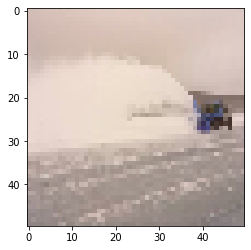

In [ ]:
y_single = model.predict(x_test[0].reshape(1,-1))
print("'Real: bad' ,Prediction is {} ".format(categories[y_single[0]]))

plt.imshow(x_test[0].reshape(50,50, -1))  
plt.show()

'Real: good' ,Prediction is good 


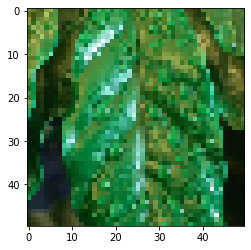

In [ ]:
y_single = model.predict(x_test[1].reshape(1,-1))
print("'Real: good' ,Prediction is {} ".format(categories[y_single[0]]))

plt.imshow(x_test[1].reshape(50,50, -1))  
plt.show()

Classification with Decision tree
---



In [ ]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
x_train = sc_X.fit_transform(x_train)
x_test = sc_X.transform(x_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier = classifier.fit(x_train,y_train)

Accuracy 68.33333333333333%
Prediction with Desicion tree is bad weather


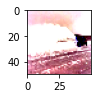

Prediction with Desicion tree is good weather


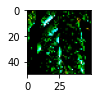

Prediction with Desicion tree is bad weather


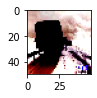

Prediction with Desicion tree is bad weather


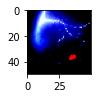

Prediction with Desicion tree is bad weather


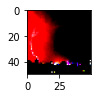

Prediction with Desicion tree is good weather


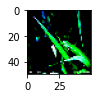

Prediction with Desicion tree is bad weather


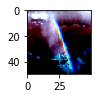

Prediction with Desicion tree is bad weather


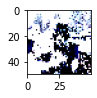

Prediction with Desicion tree is good weather


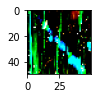

In [ ]:
#prediction
y_pred = classifier.predict(x_test)
accuracy = accuracy_score(y_test, y_pred) * 100

print("Accuracy {}%".format(accuracy))

for i in range(9):

  ax = plt.subplot(3, 3, i + 1)
  print("Prediction with Desicion tree is {} weather".format(categories[y_predict[i]]))
  weather = x_test[i].reshape(50,50, -1)
  plt.imshow(weather)
  plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn import metrics

tree_para = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}

grid_search = GridSearchCV(classifier, tree_para, cv=5,
scoring='neg_mean_squared_error',
return_train_score=True)
grid_results = grid_search.fit(x_train, y_train)

print(grid_results.best_estimator_)

DecisionTreeClassifier(ccp_alpha=0.01, criterion='entropy', max_depth=20,
                       max_features='log2')


In [ ]:
classifier = DecisionTreeClassifier(ccp_alpha=0.01, criterion='entropy', max_depth=20,
                       max_features='log2')
classifier = classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)
accuracy = accuracy_score(y_test, y_pred) * 100

print("Accuracy {}%".format(accuracy))


Accuracy 74.16666666666667%


In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
np.sqrt(mse)

0.570087712549569

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(classifier, x_test, y_test,
scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

def display_scores(scores):
  print("Scores:", scores)
  print("Mean:", scores.mean())
  print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [0.57735027 0.70710678 0.64549722 0.57735027 0.57735027 0.81649658
 0.5        0.5        0.5        0.57735027]
Mean: 0.597850166324068
Standard deviation: 0.09613451665739504


In [ ]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
  print(np.sqrt(-mean_score), params)

0.5676906968347528 {'criterion': 'gini', 'max_depth': 4}
0.5709982145672271 {'criterion': 'gini', 'max_depth': 5}
0.5741736015137971 {'criterion': 'gini', 'max_depth': 6}
0.5801925340982738 {'criterion': 'gini', 'max_depth': 7}
0.54516767348018 {'criterion': 'gini', 'max_depth': 8}
0.5318431562567509 {'criterion': 'gini', 'max_depth': 9}
0.5551412596644373 {'criterion': 'gini', 'max_depth': 10}
0.561364293600751 {'criterion': 'gini', 'max_depth': 11}
0.5485518124198396 {'criterion': 'gini', 'max_depth': 12}
0.5517386921501739 {'criterion': 'gini', 'max_depth': 15}
0.5549072696605064 {'criterion': 'gini', 'max_depth': 20}
0.5864819169940697 {'criterion': 'gini', 'max_depth': 30}
0.548492621503841 {'criterion': 'gini', 'max_depth': 40}
0.5582905262390825 {'criterion': 'gini', 'max_depth': 50}
0.5549657764105936 {'criterion': 'gini', 'max_depth': 70}
0.5285363273708339 {'criterion': 'gini', 'max_depth': 90}
0.5516798431614566 {'criterion': 'gini', 'max_depth': 120}
0.5741170521856929 {'cr